In [1]:
USE_GPU = True

In [2]:
import sys
import tensorflow as tf

# Append the custom libraries to system path
sys.path.append("/le_thanh_van_118/workspace/hiep_workspace/air_quality_index_project")

# API testing
from api.reader import csv_to_dataframe
from api.preprocessor import fill_missing, normalize_data
from api.prediction import predict_pm25_using_lstms2s_lstm, predict_pm25_using_grus2s_lstm, predict_pm25_using_cnnlstms2s_lstm

# Import src
from src.plot import plot_2_data

# Configure device
if not USE_GPU:
    print("Using CPU to train")
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
else:
    print("Using GPU to train")

# Checking Tensorflow
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_physical_devices('CPU'))

E0000 00:00:1757573936.798908 3919698 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757573936.805330 3919698 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757573936.821617 3919698 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757573936.821634 3919698 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757573936.821636 3919698 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757573936.821638 3919698 computation_placer.cc:177] computation placer already registered. Please check linka

Using GPU to train
2.19.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
df = csv_to_dataframe("df_aod_raw.csv")
df

,station,pm25,lat,lon,pm25_3km,tmp,rh,hpbl,wspd,pop,...,prim_road_len_1km,near_dist,bareland,builtup,cropland,grassland,treecover,water,ndvi,aod
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,201,31.391304,10.783057,106.700606,34.919998,25.204139,70.056728,455.131335,2.352895,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,NaN
2018-01-02,201,37.458333,10.783057,106.700606,51.830002,24.726431,73.425826,339.083720,1.903761,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,1.110117
2018-01-03,201,68.083333,10.783057,106.700606,38.240002,26.095087,77.793432,367.190738,1.293329,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,1.439045
2018-01-04,201,51.260870,10.783057,106.700606,40.259998,26.514926,82.982475,462.504210,1.588872,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,0.588595
2018-01-05,201,18.909091,10.783057,106.700606,21.690001,25.483535,93.046504,324.735356,2.505876,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,216,39.659816,10.780482,106.659511,34.439411,24.136936,73.973083,457.798645,2.002987,57523.91406,...,2345.868408,6.057246,10370.90496,885181.4309,0.0,8099.182920,95807.40771,0.0,1879.344348,NaN
2022-12-28,216,44.679352,10.780482,106.659511,29.838476,25.844296,65.530487,644.974548,2.298220,57523.91406,...,2345.868408,6.057246,10370.90496,885181.4309,0.0,8099.182920,95807.40771,0.0,1879.344348,NaN
2022-12-29,216,30.724708,10.780482,106.659511,28.450829,25.841156,67.093735,825.517395,2.823764,57523.91406,...,2345.868408,6.057246,10370.90496,885181.4309,0.0,8099.182920,95807.40771,0.0,1879.344348,0.191691


station              0
pm25                 0
lat                  0
lon                  0
pm25_3km             0
tmp                  0
rh                   0
hpbl                 0
wspd                 0
pop                  0
road_den_1km         0
prim_road_len_1km    0
near_dist            0
bareland             0
builtup              0
cropland             0
grassland            0
treecover            0
water                0
ndvi                 0
aod                  0
dtype: int64


,station,pm25,lat,lon,pm25_3km,tmp,rh,hpbl,wspd,pop,...,prim_road_len_1km,near_dist,bareland,builtup,cropland,grassland,treecover,water,ndvi,aod
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,201,31.391304,10.783057,106.700606,34.919998,25.204139,70.056728,455.131335,2.352895,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,0.576937
2018-01-02,201,37.458333,10.783057,106.700606,51.830002,24.726431,73.425826,339.083720,1.903761,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,1.110117
2018-01-03,201,68.083333,10.783057,106.700606,38.240002,26.095087,77.793432,367.190738,1.293329,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,1.439045
2018-01-04,201,51.260870,10.783057,106.700606,40.259998,26.514926,82.982475,462.504210,1.588872,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,0.588595
2018-01-05,201,18.909091,10.783057,106.700606,21.690001,25.483535,93.046504,324.735356,2.505876,20680.62695,...,6885.987305,18.537305,296.31157,764977.7039,0.0,1876.639945,232011.95950,0.0,2700.122924,0.792069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,216,39.659816,10.780482,106.659511,34.439411,24.136936,73.973083,457.798645,2.002987,57523.91406,...,2345.868408,6.057246,10370.90496,885181.4309,0.0,8099.182920,95807.40771,0.0,1879.344348,0.510534
2022-12-28,216,44.679352,10.780482,106.659511,29.838476,25.844296,65.530487,644.974548,2.298220,57523.91406,...,2345.868408,6.057246,10370.90496,885181.4309,0.0,8099.182920,95807.40771,0.0,1879.344348,0.550104
2022-12-29,216,30.724708,10.780482,106.659511,28.450829,25.841156,67.093735,825.517395,2.823764,57523.91406,...,2345.868408,6.057246,10370.90496,885181.4309,0.0,8099.182920,95807.40771,0.0,1879.344348,0.191691


Station = 201...


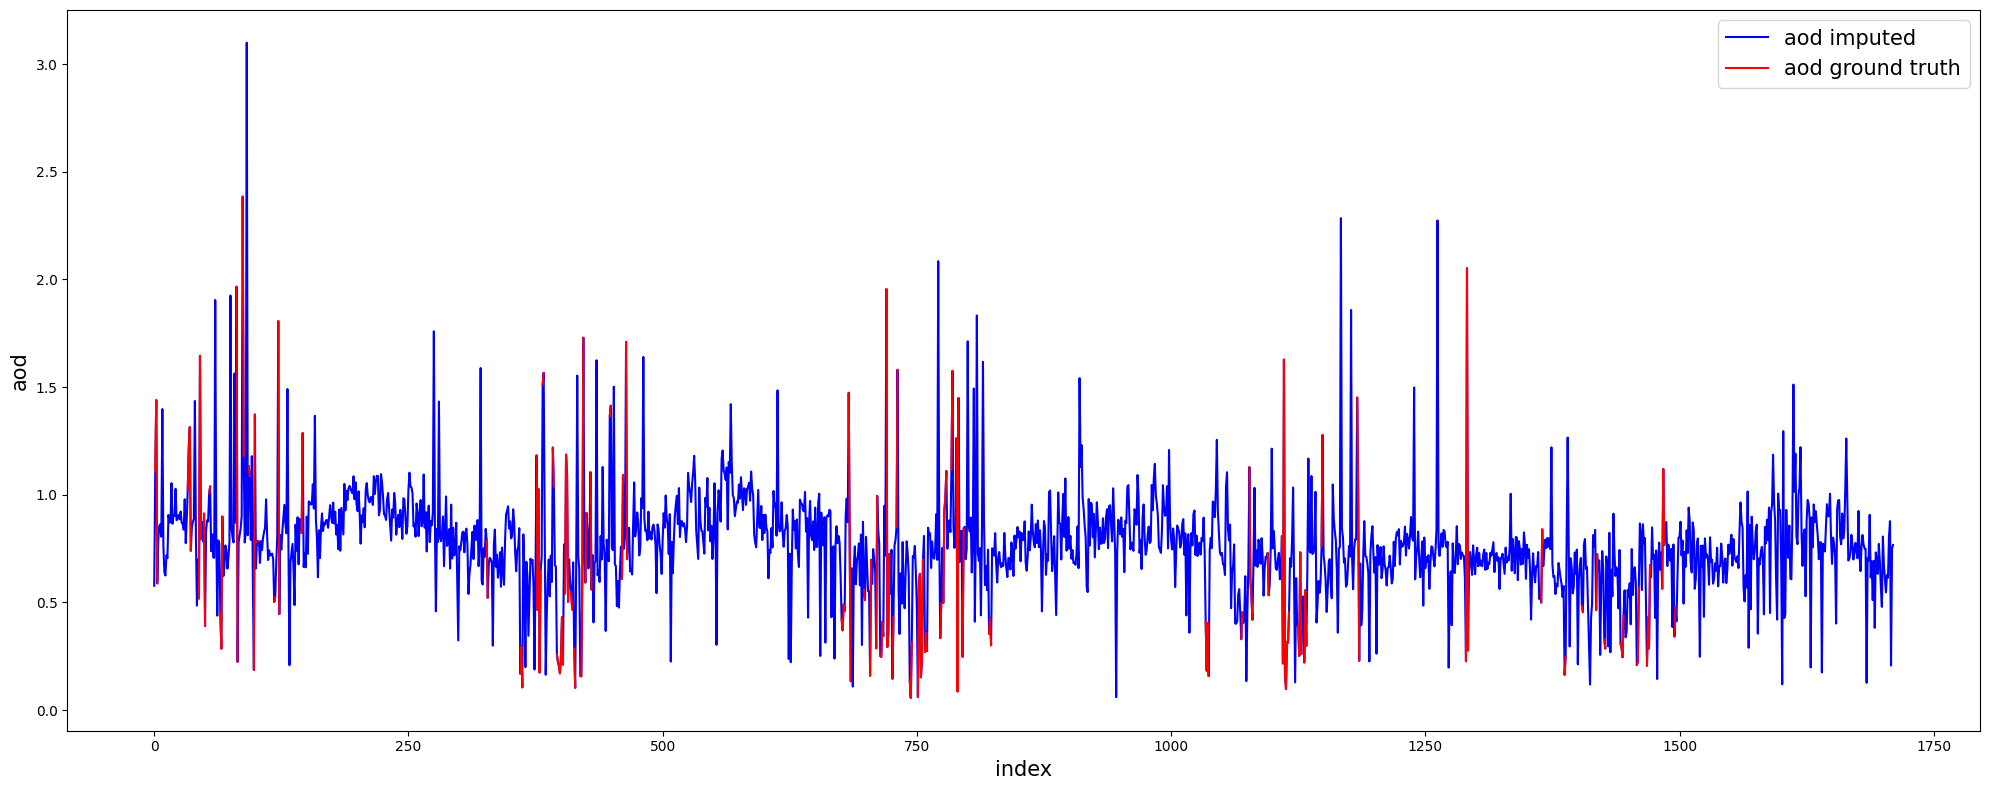

Station = 202...


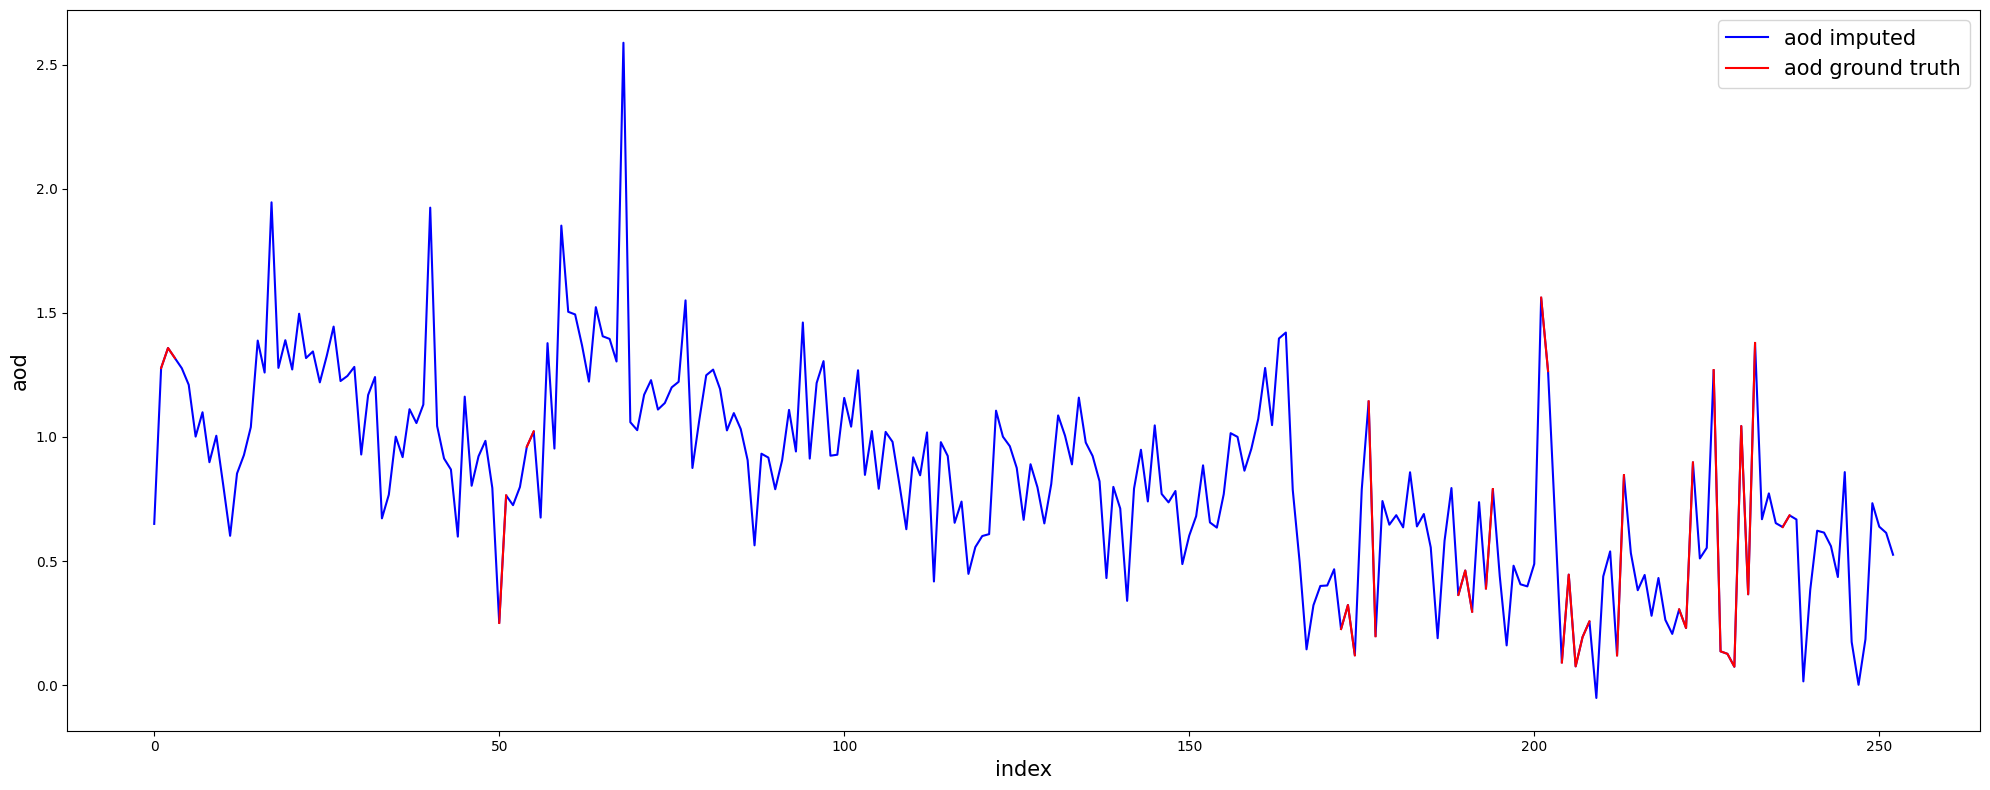

Station = 211...


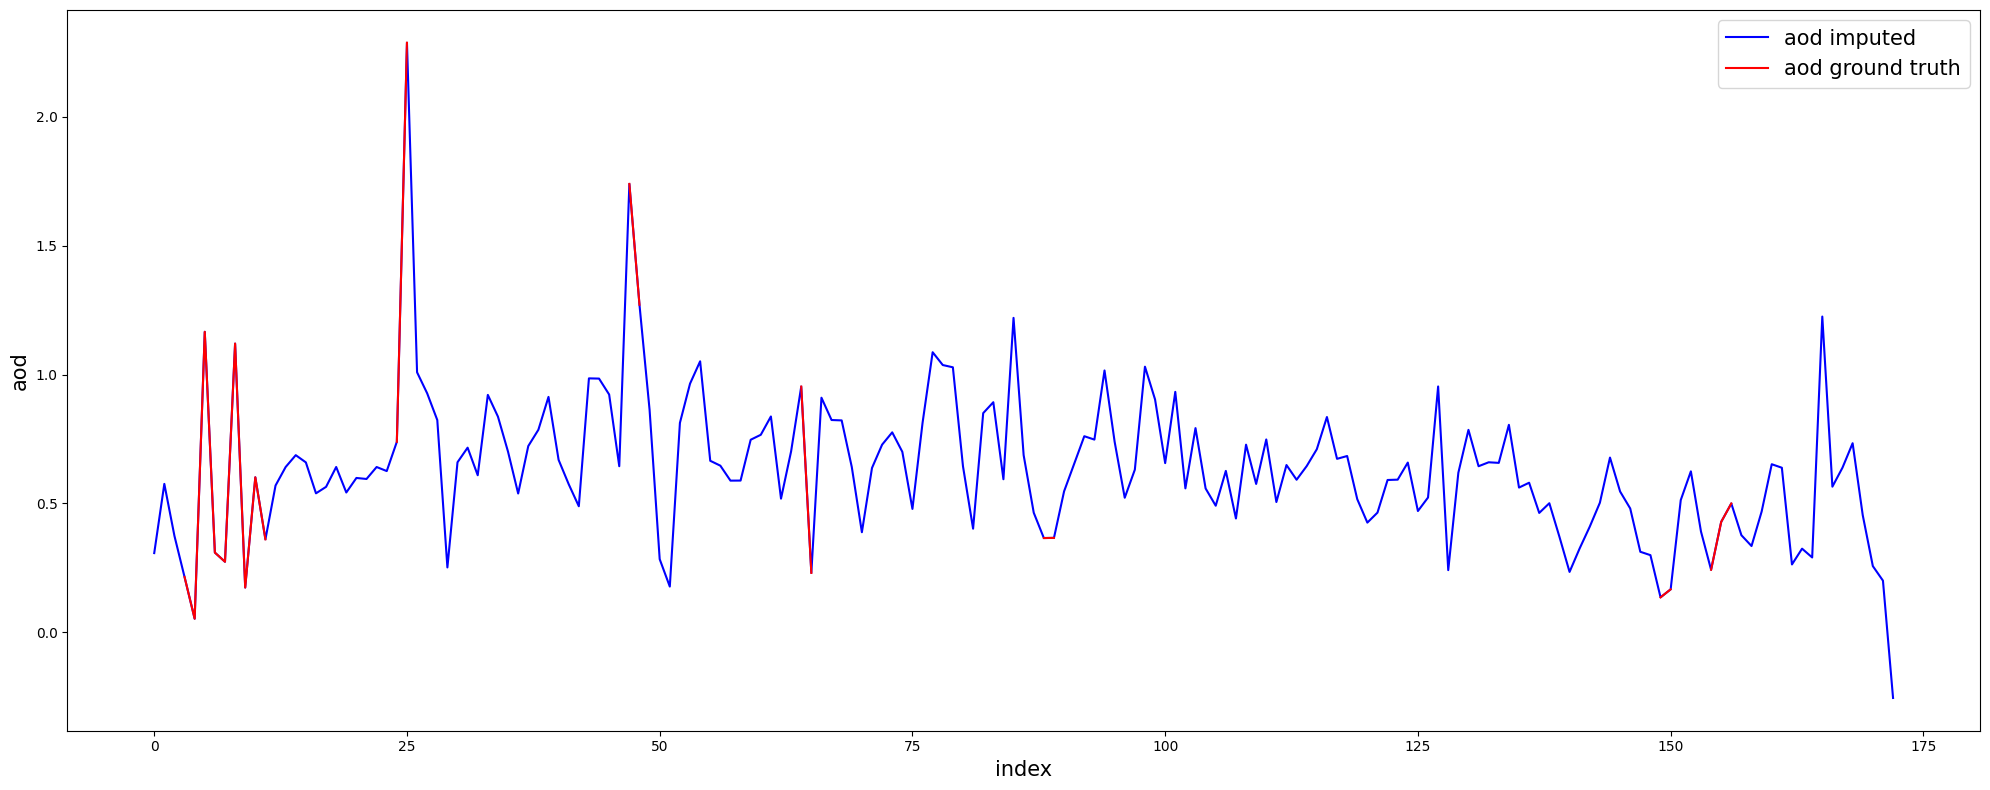

Station = 212...


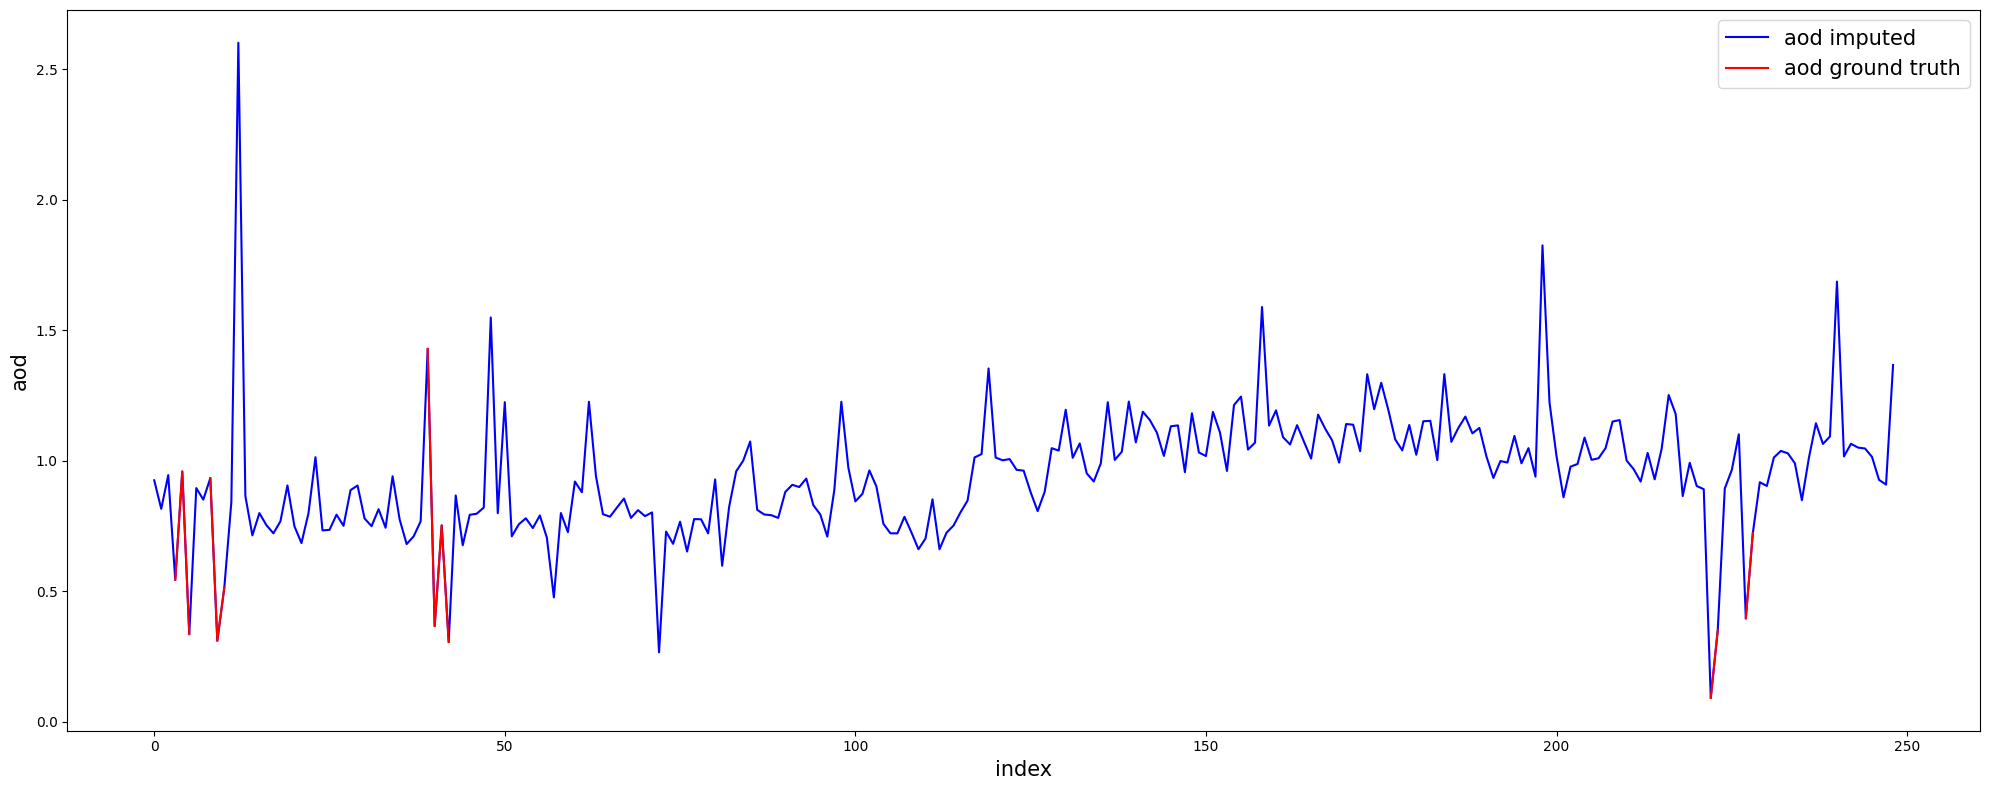

Station = 213...


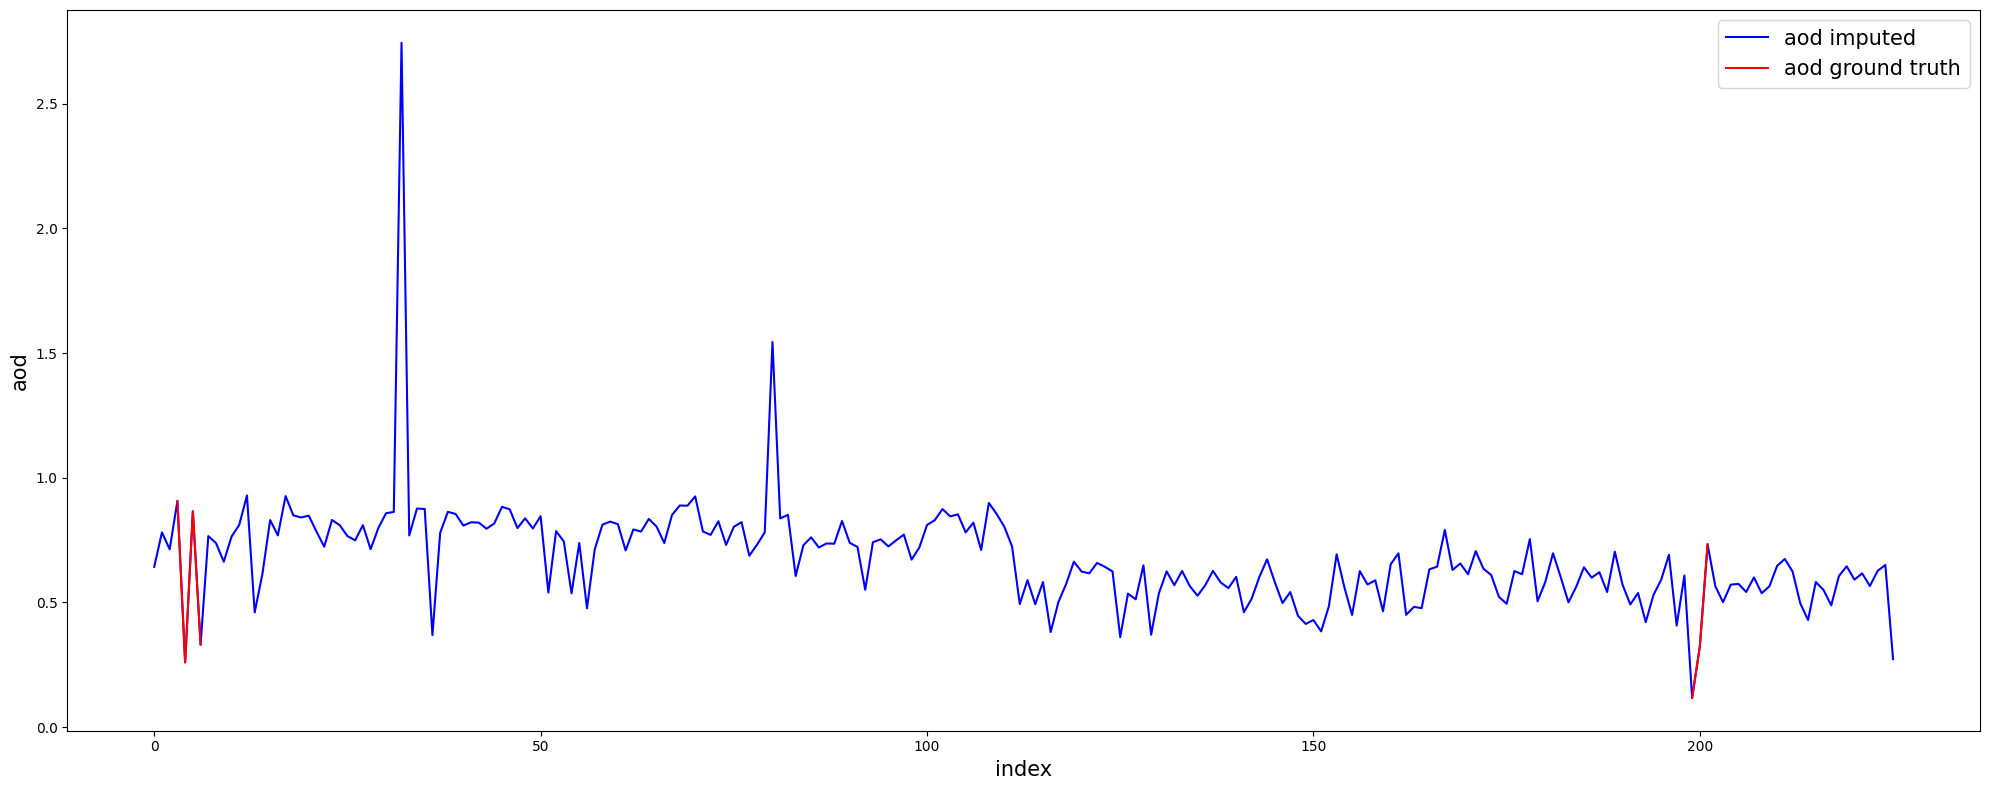

Station = 214...


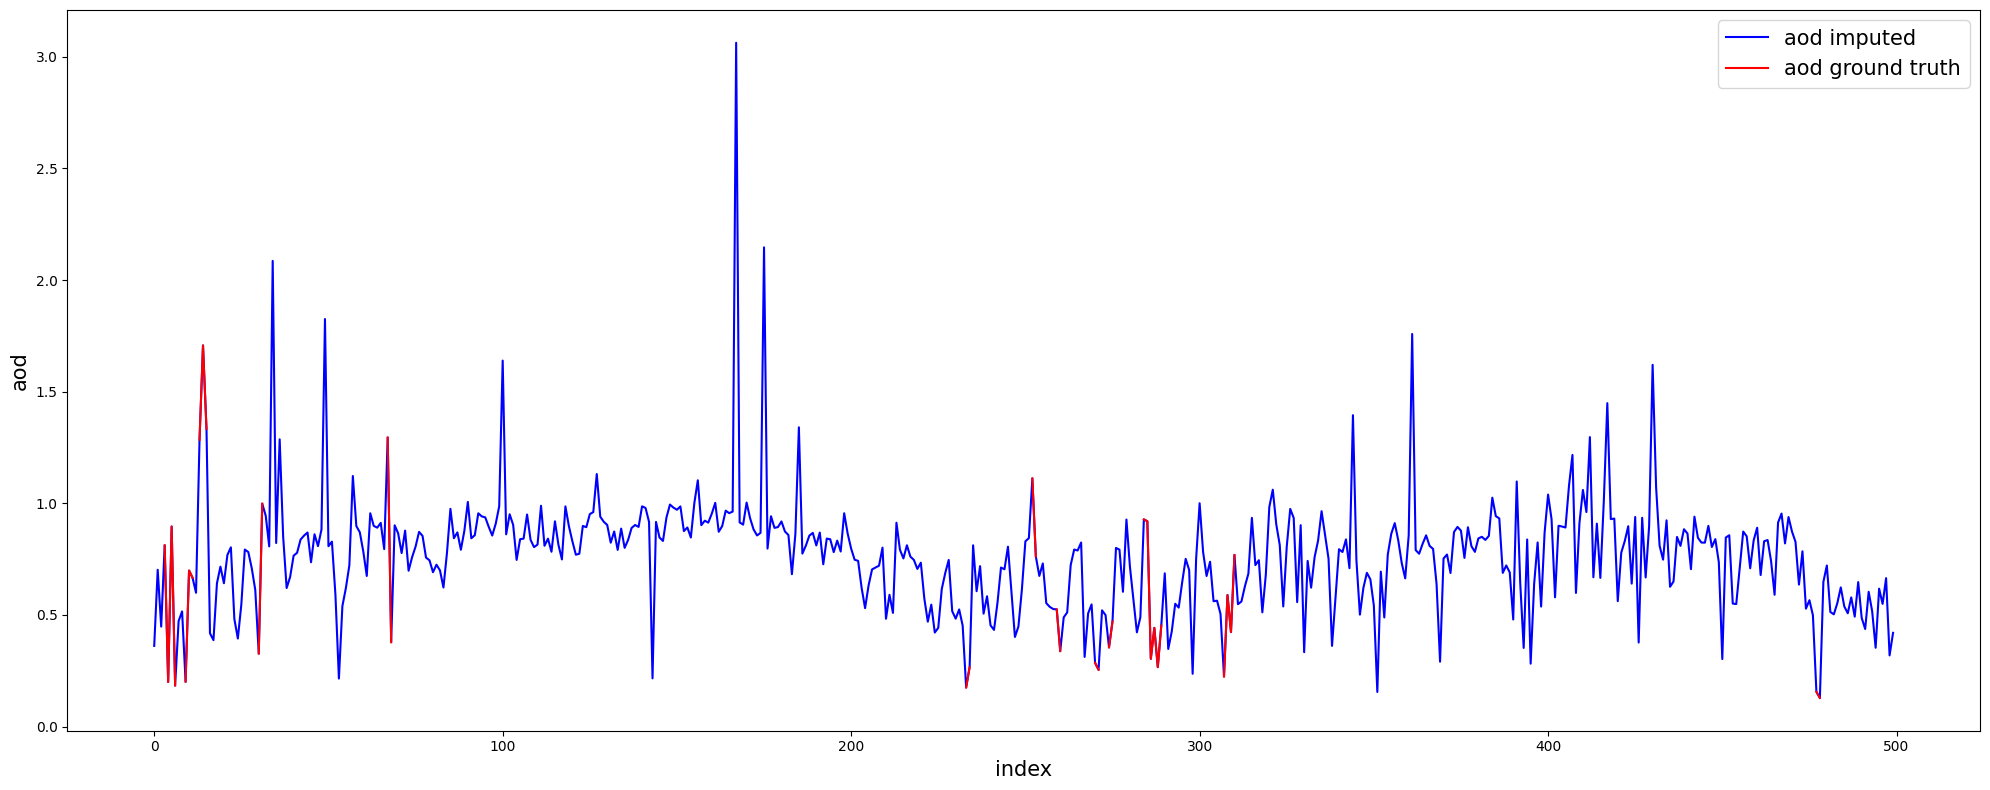

Station = 215...


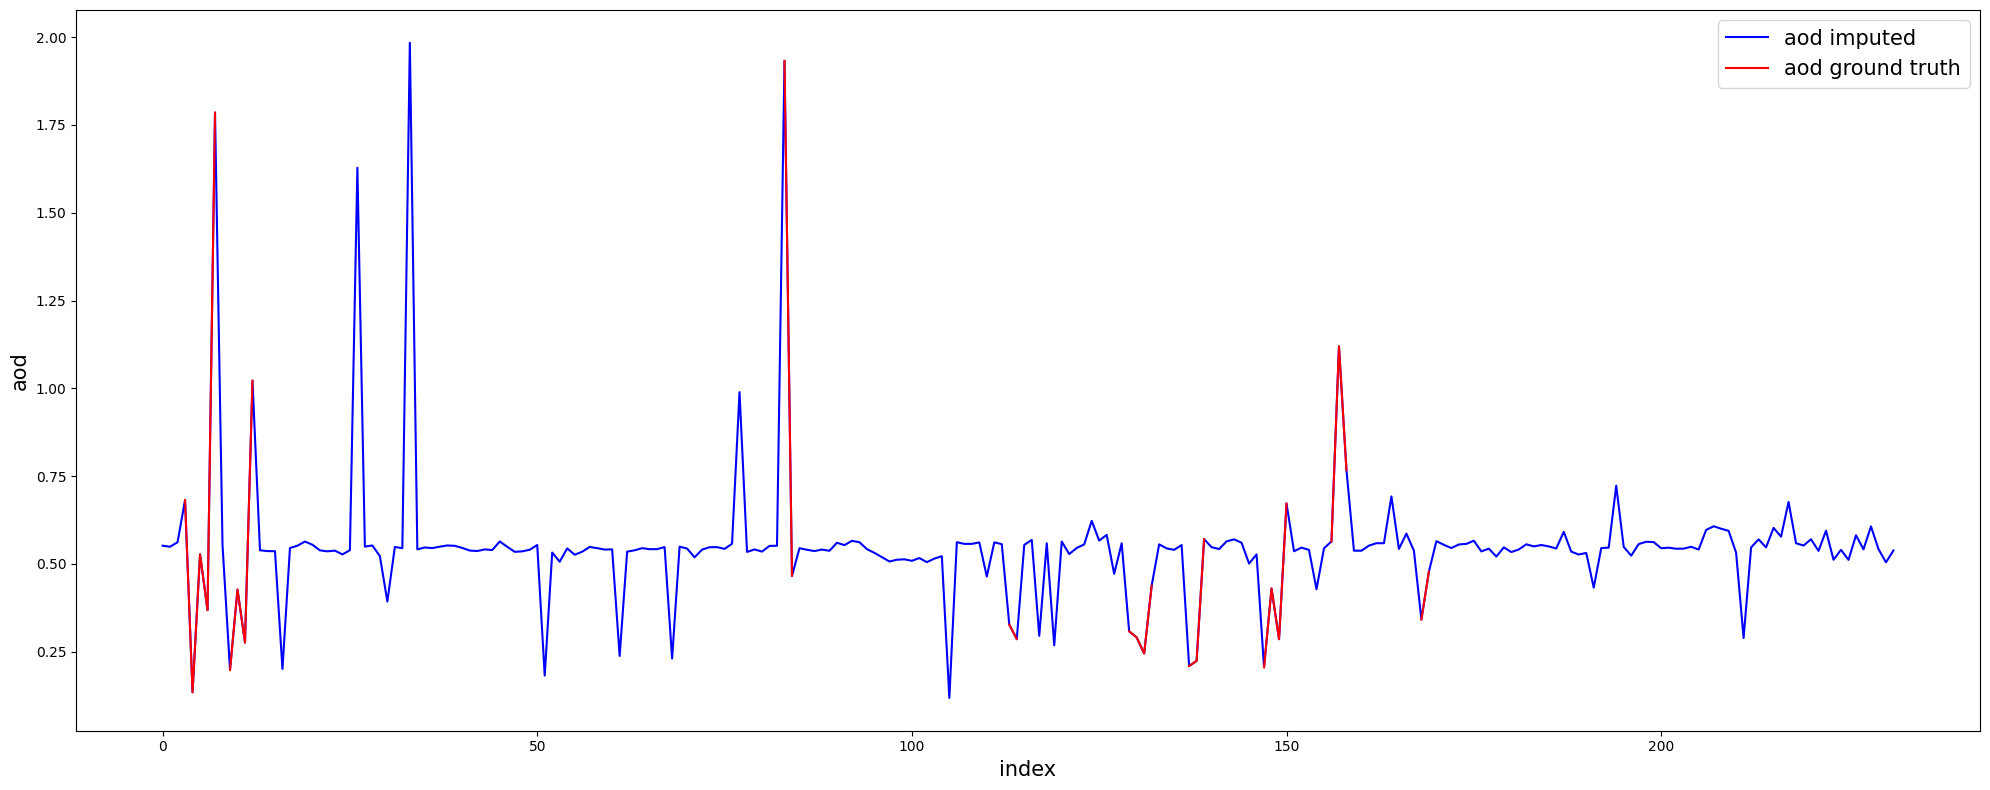

Station = 216...


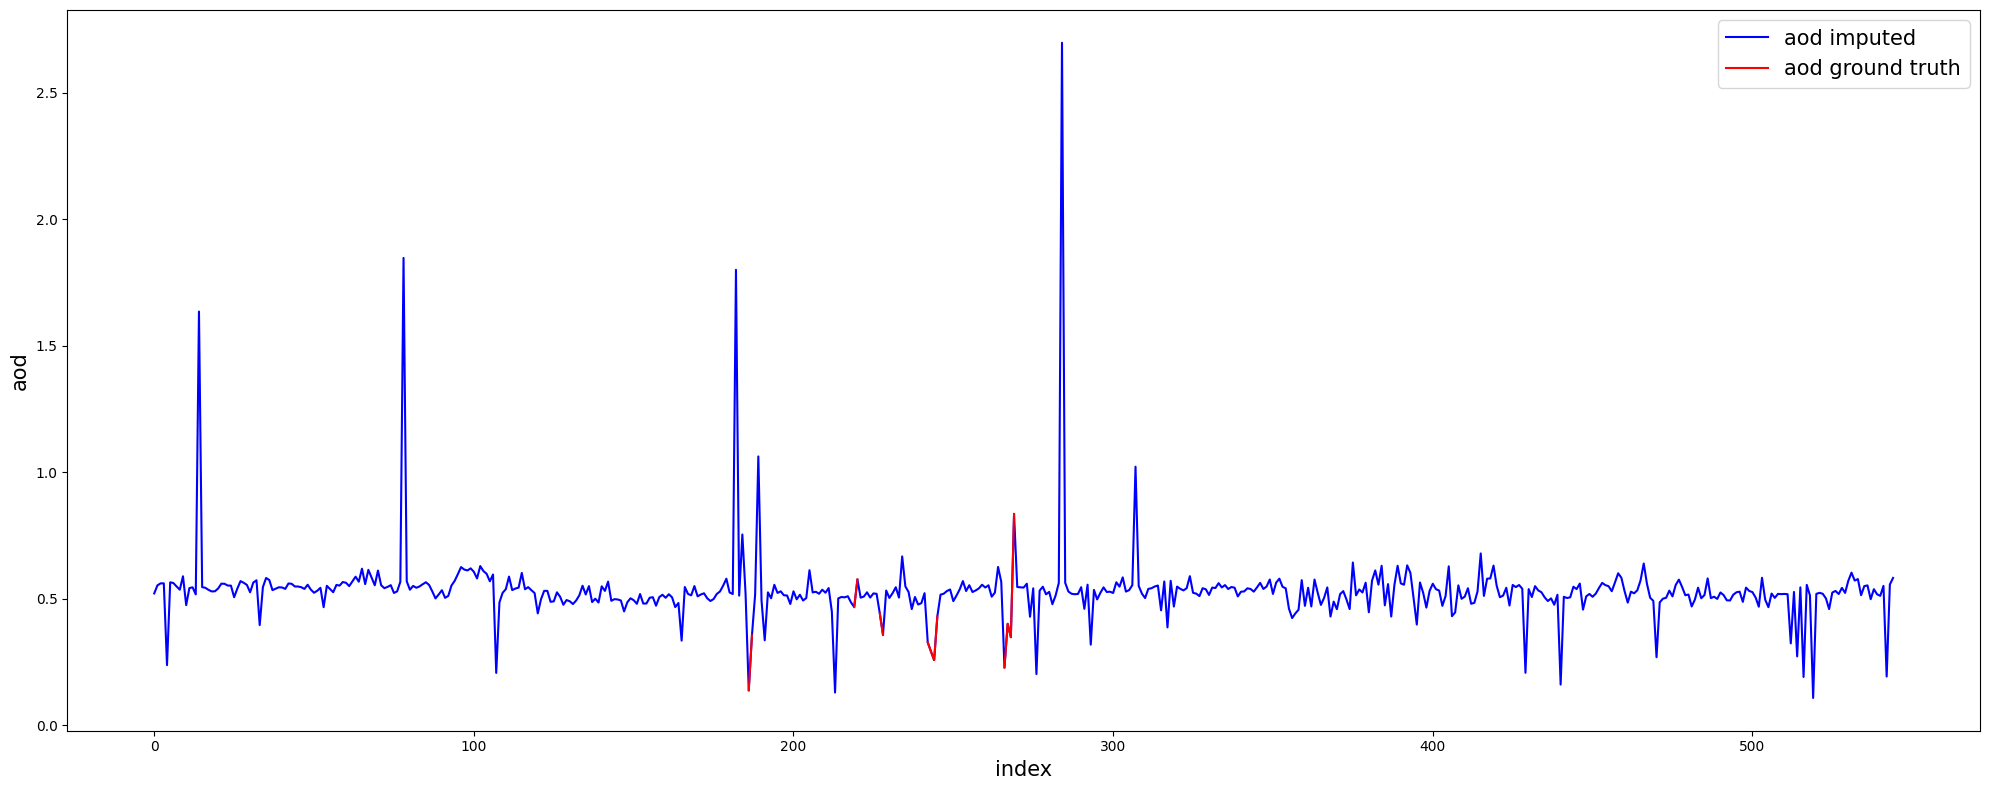

In [4]:
# Do the filling
df_filled = fill_missing(df)
print(df_filled.isnull().sum())
display(df_filled)

# Test filling function
for station in df["station"].unique():
    print(f"Station = {station}...")
    df_current_station = df[df["station"] == station]
    df_current_station_filled = df_filled[df_filled["station"] == station]
    plot_2_data(data1=df_current_station_filled["aod"],
               datalabel1="aod imputed",
               data2=df_current_station["aod"],
               datalabel2="aod ground truth",
               ylabel="aod",
               xlabel="index")

In [5]:
X_scaled, y_scaled, label_scaler = normalize_data(df_filled)
display(X_scaled)
display(y_scaled)
print(label_scaler.data_min_, label_scaler.data_max_)

,lat,lon,pop,road_den_1km,prim_road_len_1km,near_dist,bareland,builtup,cropland,grassland,treecover,water,ndvi,aod,hpbl,wspd,rh,tmp
0,0.326794,0.466551,0.116512,0.471552,0.949821,0.344052,0.00000,0.182582,0.0,0.037975,1.000000,0.0,0.526821,0.247906,0.300502,0.170694,0.468797,0.342735
1,0.326794,0.466551,0.116512,0.471552,0.949821,0.344052,0.00000,0.182582,0.0,0.037975,1.000000,0.0,0.526821,0.406922,0.211553,0.110646,0.543165,0.303640
2,0.326794,0.466551,0.116512,0.471552,0.949821,0.344052,0.00000,0.182582,0.0,0.037975,1.000000,0.0,0.526821,0.505021,0.233097,0.029033,0.639575,0.415649
3,0.326794,0.466551,0.116512,0.471552,0.949821,0.344052,0.00000,0.182582,0.0,0.037975,1.000000,0.0,0.526821,0.251383,0.306153,0.068546,0.754117,0.450008
4,0.326794,0.466551,0.116512,0.471552,0.949821,0.344052,0.00000,0.182582,0.0,0.037975,1.000000,0.0,0.526821,0.312067,0.200556,0.191147,0.976269,0.365600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,0.306899,0.237227,0.857395,0.785926,0.323578,0.075528,0.62963,0.720601,0.0,0.170886,0.375453,0.0,0.085003,0.228102,0.302546,0.123912,0.555246,0.255396
3885,0.306899,0.237227,0.857395,0.785926,0.323578,0.075528,0.62963,0.720601,0.0,0.170886,0.375453,0.0,0.085003,0.239903,0.446013,0.163384,0.368885,0.395124
3886,0.306899,0.237227,0.857395,0.785926,0.323578,0.075528,0.62963,0.720601,0.0,0.170886,0.375453,0.0,0.085003,0.133010,0.584396,0.233647,0.403392,0.394867
3887,0.306899,0.237227,0.857395,0.785926,0.323578,0.075528,0.62963,0.720601,0.0,0.170886,0.375453,0.0,0.085003,0.241484,0.473268,0.376650,0.354270,0.324368


,pm25
0,0.325673
1,0.398696
2,0.767302
3,0.564825
4,0.175435
...,...
3884,0.425193
3885,0.485609
3886,0.317649
3887,0.346136


[4.33333333] [87.41666667]


In [6]:
print(X_scaled)

           lat       lon       pop  road_den_1km  prim_road_len_1km  \
0     0.326794  0.466551  0.116512      0.471552           0.949821   
1     0.326794  0.466551  0.116512      0.471552           0.949821   
2     0.326794  0.466551  0.116512      0.471552           0.949821   
3     0.326794  0.466551  0.116512      0.471552           0.949821   
4     0.326794  0.466551  0.116512      0.471552           0.949821   
...        ...       ...       ...           ...                ...   
3884  0.306899  0.237227  0.857395      0.785926           0.323578   
3885  0.306899  0.237227  0.857395      0.785926           0.323578   
3886  0.306899  0.237227  0.857395      0.785926           0.323578   
3887  0.306899  0.237227  0.857395      0.785926           0.323578   
3888  0.306899  0.237227  0.857395      0.785926           0.323578   

      near_dist  bareland   builtup  cropland  grassland  treecover  water  \
0      0.344052   0.00000  0.182582       0.0   0.037975   1.000000  

In [7]:
# Define range of dimension to run
range_of_dimension = range(11, 13)

from src.config_reader import ConfigurationReader
conf = ConfigurationReader("/le_thanh_van_118/hiep_workspace/air_quality_index_project/model_params.json").data
reduction_n_past = conf["reduction"]["n_past"]
reduction_n_future = conf["reduction"]["n_future"]
reduction_epochs = conf["reduction"]["epochs"]
reduction_batch_size = conf["reduction"]["batch_size"]

prediction_n_past = conf["prediction"]["n_past"]
#prediction_n_future = conf["prediction"]["n_future"]
#prediction_n_future = 2
prediction_n_future = 1
prediction_epochs = conf["prediction"]["epochs"]
prediction_batch_size = conf["prediction"]["batch_size"]

In [ ]:
lstms2s_predicted_pm25 = predict_pm25_using_lstms2s_lstm(X_scaled, y_scaled,
                                                        label_scaler,
                                                        range_of_dimension,
                                                        reduction_n_past, reduction_n_future,
                                                        reduction_epochs, reduction_batch_size,
                                                        prediction_n_past, prediction_n_future,
                                                        prediction_epochs, prediction_batch_size)
lstms2s_predicted_pm25.shape

I0000 00:00:1757573943.371241 3919698 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 845 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:b1:00.0, compute capability: 8.0
I0000 00:00:1757573947.928084 3919782 service.cc:152] XLA service 0x55ab670c5d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757573947.928113 3919782 service.cc:160]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
I0000 00:00:1757573948.866493 3919782 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757573950.792382 3919782 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Model: "aod_LSTMSeq2SeqReduction_11_features_no_pm25_3km"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 7, 18)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 7, 100)    │     47,600 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 50),      │     30,200 │ lstm[0][0]        │
│                     │ (None, 50),       │            │                   │
│                     │ (None, 50)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 11)        │        561 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 7, 11)     │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 7, 50)     │     12,400 │ repeat_vector[0]… │
│                     │                   │            │ lstm_1[0][1],     │
│                     │                   │            │ lstm_1[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 7, 100)    │     60,400 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 7, 18)     │      1,818 │ lstm_3[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 458,939 (1.75 MB)

 Trainable params: 152,979 (597.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 305,960 (1.17 MB)

None


Model: "aod_LSTMSeq2SeqReduction_11_features_no_pm25_3km_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7, 18)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 7, 100)         │        47,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ [(None, 50), (None,    │        30,200 │
│                                 │ 50), (None, 50)]       │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,361 (306.10 KB)

 Trainable params: 78,361 (306.10 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "aod_LSTMPrediction_with_LSTMSeq2SeqReduction_11_features_no_pm25_3km"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 7, 12)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ [(None, 64),      │     19,712 │ input_layer_2[0]… │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 1, 64)     │          0 │ lstm_4[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 1, 64)     │     33,024 │ repeat_vector_1[… │
│                     │                   │            │ lstm_4[0][1],     │
│                     │                   │            │ lstm_4[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 64)     │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 1, 1)      │         65 │ dropout[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 52,801 (206.25 KB)

 Trainable params: 52,801 (206.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
plot_2_data(data2=lstms2s_predicted_pm25, datalabel2="predicted pm25", data1=df["pm25"], datalabel1="actual pm25")

In [ ]:
grus2s_predicted_pm25 = predict_pm25_using_grus2s_lstm(X_scaled, y_scaled,
                                                        label_scaler,
                                                        range_of_dimension,
                                                        reduction_n_past, reduction_n_future,
                                                        reduction_epochs, reduction_batch_size,
                                                        prediction_n_past, prediction_n_future,
                                                        prediction_epochs, prediction_batch_size)
grus2s_predicted_pm25.shape

In [ ]:
plot_2_data(data2=grus2s_predicted_pm25, datalabel2="predicted pm25", data1=df["pm25"], datalabel1="actual pm25")

In [ ]:
cnnlstms2s_predicted_pm25 = predict_pm25_using_cnnlstms2s_lstm(X_scaled, y_scaled,
                                                        label_scaler,
                                                        range_of_dimension,
                                                        reduction_n_past, reduction_n_future,
                                                        reduction_epochs, reduction_batch_size,
                                                        prediction_n_past, prediction_n_future,
                                                        prediction_epochs, prediction_batch_size)
cnnlstms2s_predicted_pm25.shape

In [ ]:
plot_2_data(data2=cnnlstms2s_predicted_pm25, datalabel2="predicted pm25", data1=df["pm25"], datalabel1="actual pm25")